# 2. Exploratory Data Analysis

Before starting with the models, let's explore the data we have obtained in the first notebook. 
This analysis will help to discover patterns, detect anomalies, test a hypothesis or check assumptions.

## 2.1. Exploratory analysis of Movements dataframe

In [1]:
#!pip install sweetviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import datetime as dt
import seaborn as sns

In [2]:
rides_per_hour = pd.read_csv('movements_grouped.csv')


In [3]:
rides_per_hour

,Unnamed: 0,date,weekday,day_x,hour,time,month,rides,holiday,datetime,is_holiday_x,is_weekend,year,is_holiday_y
0,0,2018-12-31,Monday,31,23,23:00:00,12,176,no festivo,2018-12-31 23:00:00,0,0,2018,0
1,1,2019-01-02,Wednesday,2,0,00:00:00,1,52,no festivo,2019-01-02 00:00:00,0,0,2019,0
2,2,2019-01-02,Wednesday,2,1,01:00:00,1,29,no festivo,2019-01-02 01:00:00,0,0,2019,0
3,3,2019-01-02,Wednesday,2,2,02:00:00,1,32,no festivo,2019-01-02 02:00:00,0,0,2019,0
4,4,2019-01-02,Wednesday,2,3,03:00:00,1,23,no festivo,2019-01-02 03:00:00,0,0,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,21884,2021-01-06,Wednesday,6,19,19:00:00,1,277,festivo,2021-01-06 19:00:00,1,0,2021,1
21885,21885,2021-01-06,Wednesday,6,20,20:00:00,1,219,festivo,2021-01-06 20:00:00,1,0,2021,1
21886,21886,2021-01-06,Wednesday,6,21,21:00:00,1,191,festivo,2021-01-06 21:00:00,1,0,2021,1
21887,21887,2021-01-06,Wednesday,6,22,22:00:00,1,212,festivo,2021-01-06 22:00:00,1,0,2021,1


In [73]:
rides_per_hour['weekday_no']=rides_per_hour['datetime']

In [74]:
#We only consider the columns we are interested in
rides_per_hour = rides_per_hour[['year','datetime', 'weekday', 'hour',  'time', 'month', 'is_holiday_x', 'is_weekend','rides', 'day_x', 'date']]
#We set the index as the datetime
rides_per_hour.set_index('datetime', inplace=True)
rides_per_hour.sort_index(inplace=True)

C:\Users\paula\Anaconda3\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


In [75]:
#We change the index of the dataframe to datetime format
rides_per_hour.index=pd.to_datetime(rides_per_hour.index)

In [76]:
rides_per_hour['day'] = rides_per_hour['day_x']
rides_per_hour.drop(['day_x'], axis=1)

<ipython-input-76-f9dbeac27376>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_per_hour['day'] = rides_per_hour['day_x']


,year,weekday,hour,time,month,is_holiday_x,is_weekend,rides,date,day
datetime,,,,,,,,,,
2018-12-31 23:00:00,2018,Monday,23,23:00:00,12,0,0,176,2018-12-31,31
2019-01-01 00:00:00,2019,Tuesday,0,00:00:00,1,1,0,254,2019-01-01,1
2019-01-01 01:00:00,2019,Tuesday,1,01:00:00,1,1,0,169,2019-01-01,1
2019-01-01 02:00:00,2019,Tuesday,2,02:00:00,1,1,0,105,2019-01-01,1
2019-01-01 03:00:00,2019,Tuesday,3,03:00:00,1,1,0,83,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,2021,Wednesday,19,19:00:00,6,0,0,813,2021-06-30,30
2021-06-30 20:00:00,2021,Wednesday,20,20:00:00,6,0,0,552,2021-06-30,30
2021-06-30 21:00:00,2021,Wednesday,21,21:00:00,6,0,0,571,2021-06-30,30


### 2.1.1. Evolution of demand with time (plotting the time series)

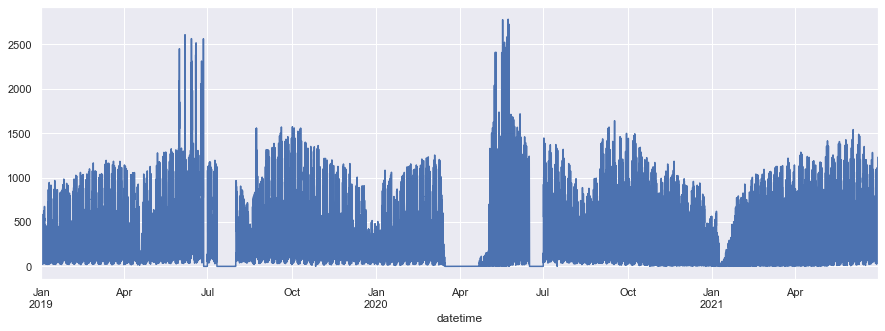

In [77]:
plt.figure(figsize=(15,5))

rides_per_hour['rides'].plot()
plt.show()

From the plot we can see that the demand follows a time series, with some peaks in demand.
It is important to note that there are some months when there is no demand:

- August 2019
- March 2020-May 2020
- July 2020
- January 2021

The period of Covid-19 impacted the demand of the service, so in order to build our models to predict the demand we need to determine how to handle these months to not disturbe our model.

We can see that in august, the vacation period, the demand is quite lower than the rest of the months. Also in January, probaby due to the cold weather, the demand is lower than the rest of the year. The months where the demand is higher is in may/june, probably due to the good weather.

#### Demand per years

In [78]:
rides_2021 = rides_per_hour[rides_per_hour['year']==2021]
rides_2020 = rides_per_hour[rides_per_hour['year']==2020]
rides_2019 = rides_per_hour[rides_per_hour['year']==2019]

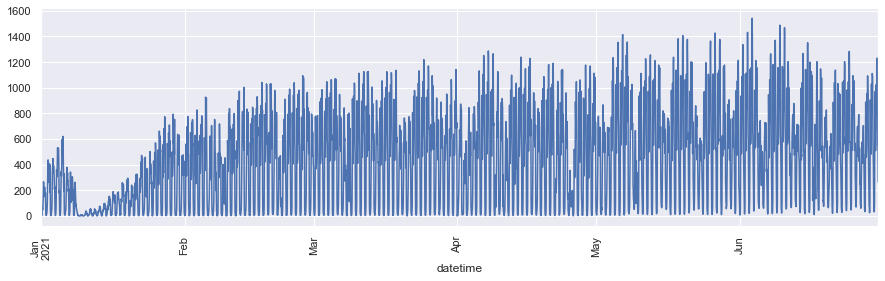

In [79]:
plt.figure(figsize=(15,
                   4))

rides_2021['rides'].plot()

plt.xticks(rotation=90);

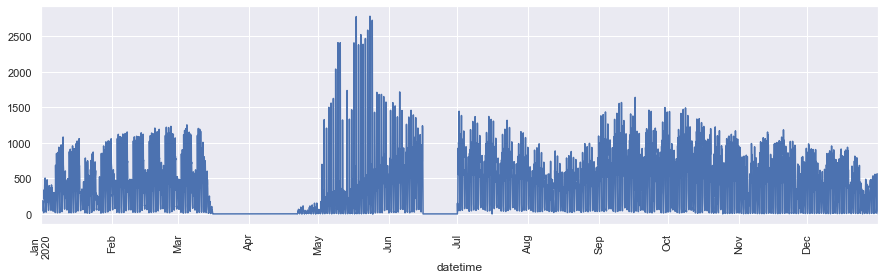

In [80]:
plt.figure(figsize=(15,
                   4))

rides_2020['rides'].plot()

plt.xticks(rotation=90);

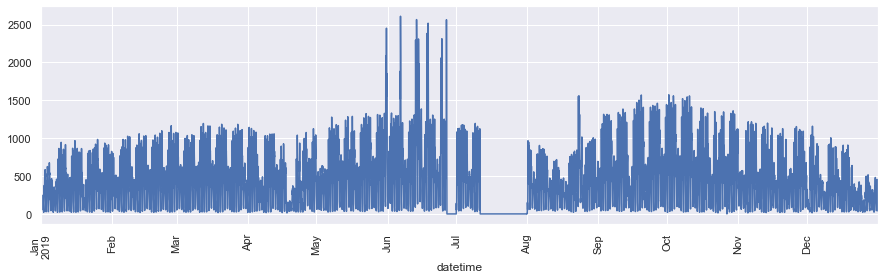

In [81]:
plt.figure(figsize=(15,
                   4))

rides_2019['rides'].plot()

plt.xticks(rotation=90);

### 2.1.2. Demand behaviour (hour, month, weekday)

##### Average number of rides per weekday (working- non working days, holiday-no holiday)

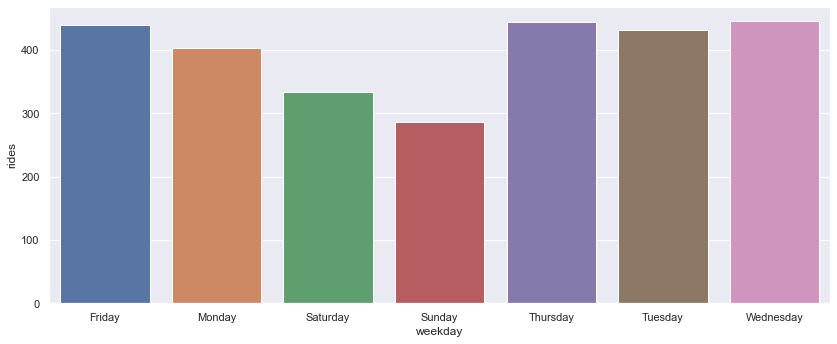

In [82]:
fig = plt.figure(figsize=(14,12))
axes = fig.add_subplot(2,1,1)

rides_per_weekday = pd.DataFrame(rides_per_hour.groupby(['weekday'])['rides'].mean()).reset_index()
days = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
rides_per_weekday['weekday_num']=rides_per_weekday['weekday'].map(days)
rides_per_weekday.sort_values(by='weekday_num', inplace=True)
sns.barplot(data=rides_per_weekday, x='weekday', y = 'rides', ax=axes);

In [83]:
rides_per_hour

,year,weekday,hour,time,month,is_holiday_x,is_weekend,rides,day_x,date,day
datetime,,,,,,,,,,,
2018-12-31 23:00:00,2018,Monday,23,23:00:00,12,0,0,176,31,2018-12-31,31
2019-01-01 00:00:00,2019,Tuesday,0,00:00:00,1,1,0,254,1,2019-01-01,1
2019-01-01 01:00:00,2019,Tuesday,1,01:00:00,1,1,0,169,1,2019-01-01,1
2019-01-01 02:00:00,2019,Tuesday,2,02:00:00,1,1,0,105,1,2019-01-01,1
2019-01-01 03:00:00,2019,Tuesday,3,03:00:00,1,1,0,83,1,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,2021,Wednesday,19,19:00:00,6,0,0,813,30,2021-06-30,30
2021-06-30 20:00:00,2021,Wednesday,20,20:00:00,6,0,0,552,30,2021-06-30,30
2021-06-30 21:00:00,2021,Wednesday,21,21:00:00,6,0,0,571,30,2021-06-30,30


Demand is higher on weekdays than on non-working days, indicating that the bicycle service is used for commuting to work.

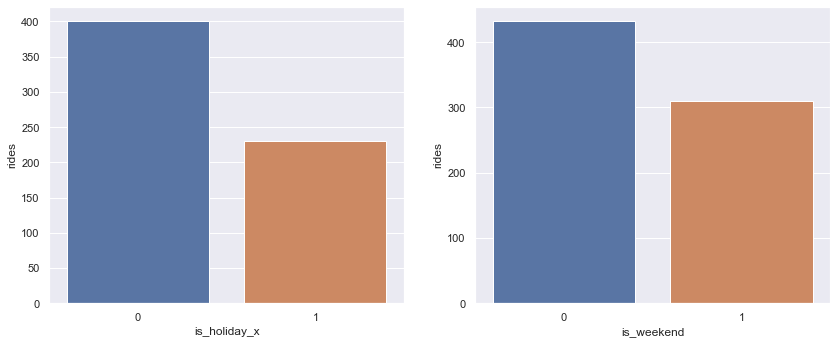

In [84]:
fig = plt.figure(figsize=(14,12))
axes = fig.add_subplot(2,2,1)

rides_per_holiday = pd.DataFrame(rides_per_hour.groupby(['is_holiday_x'])['rides'].mean()).reset_index()
sns.barplot(data=rides_per_holiday, x='is_holiday_x', y = 'rides', ax=axes);

axes = fig.add_subplot(2,2,2)

rides_per_weekend = pd.DataFrame(rides_per_hour.groupby(['is_weekend'])['rides'].mean()).reset_index()
sns.barplot(data=rides_per_weekend, x='is_weekend', y = 'rides', ax=axes);

From the plot above we can see that the demand is higher the laborable-days, than on weekends and holidays

##### Average number of rides per month


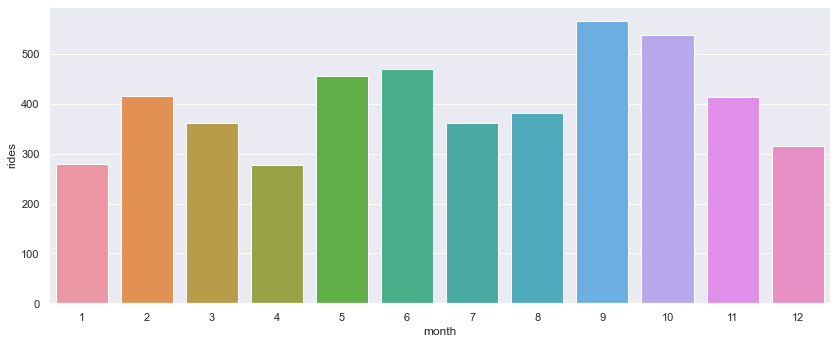

In [85]:
fig = plt.figure(figsize=(14,12))
axes = fig.add_subplot(2,1,1)

rides_per_month = pd.DataFrame(rides_per_hour.groupby(['month'])['rides'].mean()).reset_index()
sns.barplot(data=rides_per_month, x='month', y = 'rides', ax=axes);

Now we are going to use a boxplot to understand the distribution of demand in each months and identify the outliers

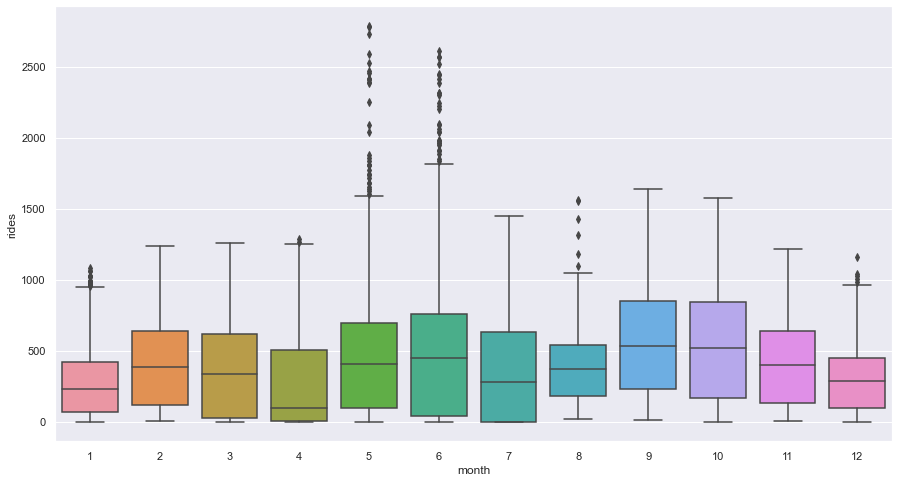

In [86]:
sns.set(rc = {'figure.figsize': (15,8)})
sns.boxplot(data=rides_per_hour, x='month', y ='rides');

In January, May, June, August and December there are a lot of outliers, this can be explained with the changes in the weather in the months of December and January, because of variable distribution across the day.

The outliers in may and april can be explained by the covid-19 situation

The months with higher demand of the service are september and october, followed by june and may.
This indicates that the service is used when the weather is good

##### Average number of rides per hour


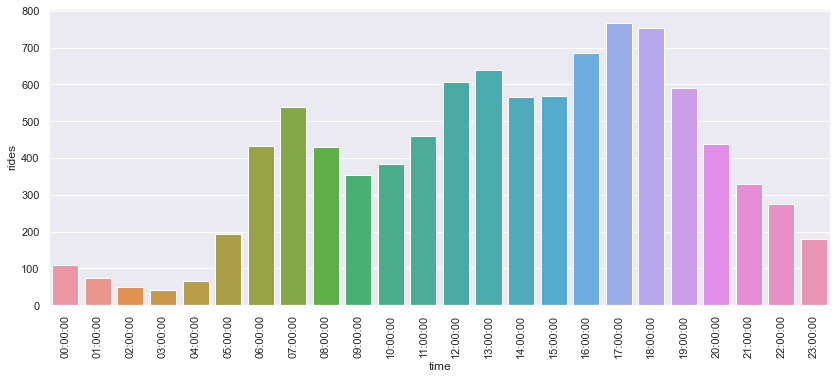

In [87]:
fig = plt.figure(figsize=(14,12))
axes = fig.add_subplot(2,1,1)

rides_per_hour_demand = pd.DataFrame(rides_per_hour.groupby(['time'])['rides'].mean()).reset_index()
sns.barplot(data=rides_per_hour_demand, x='time', y = 'rides', ax=axes);
axes.set_xticklabels(axes.get_xticklabels(), rotation=90);

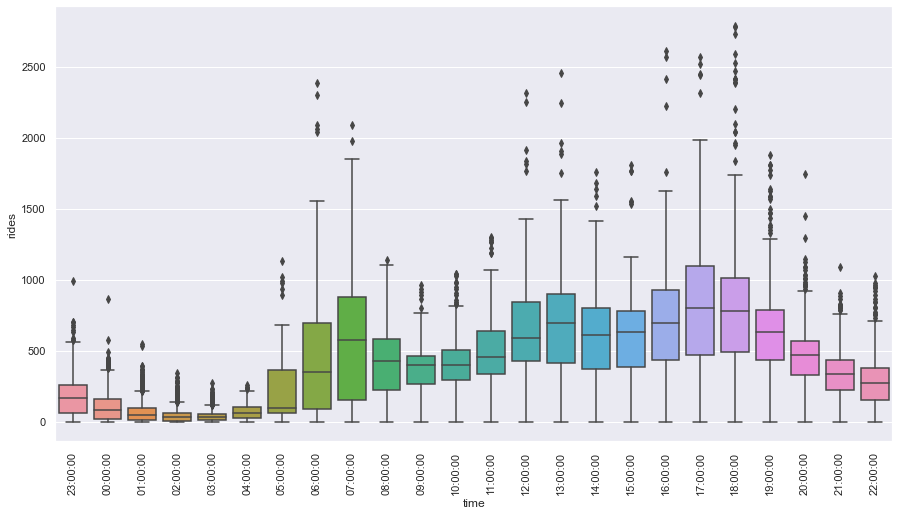

In [88]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='time', y = 'rides', data = rides_per_hour);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In both plots above we can see that the hours of higher demand are between 16 and 18.
Also there is a higher demand between 12 and 13 pm and at 7am.

These patterns coincide with the commuting times to the work location.
The hours of less demand are in the early morning hours, from 00 to 04 am

###### Plot of the hourly demand in weekdays and weekends

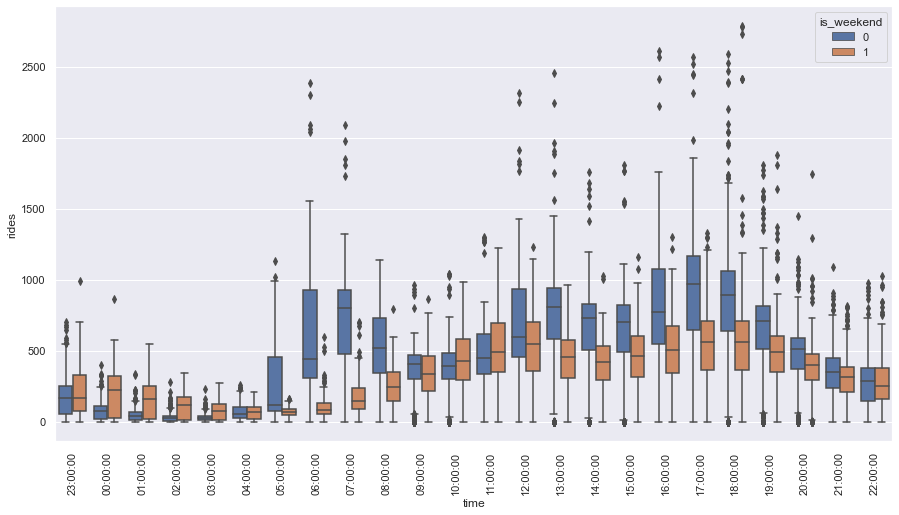

In [89]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='time', y = 'rides', data = rides_per_hour, hue='is_weekend');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='hour', ylabel='rides'>

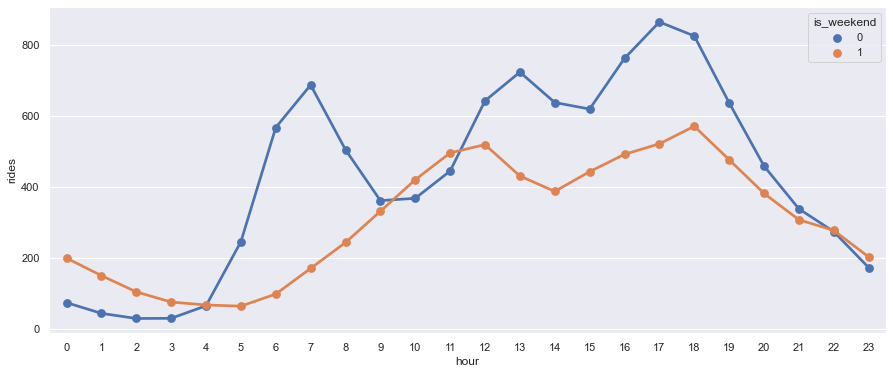

In [90]:
plt.figure(figsize=(15,
                   6))
rides_per_hour_workingday = pd.DataFrame(rides_per_hour.groupby(['is_weekend', 'hour'])['rides'].mean()).reset_index()
sns.pointplot(data=rides_per_hour_workingday, x='hour', y='rides', hue='is_weekend', legend=True)



In the graph above we can see the hourly demand patterns depending on whether it is a weekend or a weekday. There are two patterns of demand clearly differenciated

Blue shows the demand per hour on weekdays, as can be seen, the hours with the highest demand are between 6 and 7 a.m. and between 4 and 5 p.m., and there is also a high demand at 12 and 18 o'clock.

On the other hand, orange represents the demand by hours on weekends, which stands out because it has a higher demand between 12 and 3 a.m., which can be explained because the service is used when the subway is closed.



###### Plot of the hourly demand dependinng the day of week

<AxesSubplot:xlabel='hour', ylabel='rides'>

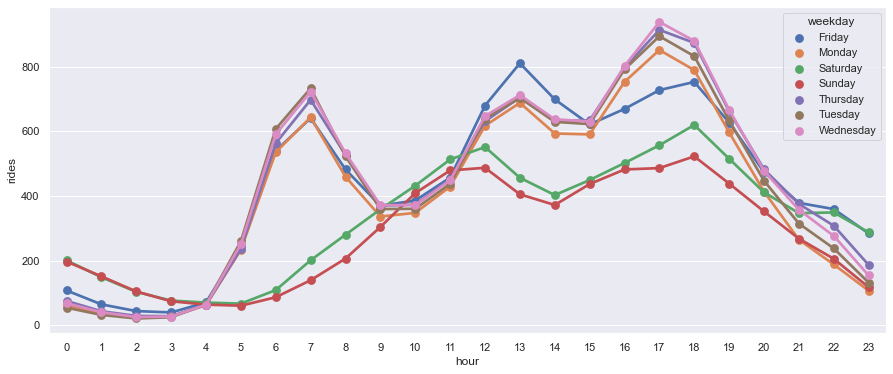

In [91]:
plt.figure(figsize=(15,
                   6))
rides_per_hour_weekday = pd.DataFrame(rides_per_hour.groupby(['weekday', 'hour'])['rides'].mean()).reset_index()
sns.pointplot(data=rides_per_hour_weekday, x='hour', y='rides', hue='weekday', legend=True)



From the plot we see that the pattern is similar in the weekends (saturday and sunday) and in the weekdays (mondays, tuesdays, wednesdays, thursdays, fridays).

In the weekdays the demand is similar, the most different is on Friday.

### 2.1.3. Correlation between variables

To understand the correlation between variables we are going to add lag variables.

In [92]:
rides_per_hour['lag_1'] = rides_per_hour['rides'].shift(1*24)
rides_per_hour['lag_2'] = rides_per_hour['rides'].shift(2*24)
rides_per_hour['lag_3'] = rides_per_hour['rides'].shift(3*24)
rides_per_hour['lag_4'] = rides_per_hour['rides'].shift(4*24)
rides_per_hour['lag_5'] = rides_per_hour['rides'].shift(5*24)
rides_per_hour['lag_6'] = rides_per_hour['rides'].shift(6*24)
rides_per_hour['lag_7'] = rides_per_hour['rides'].shift(7*24)

<ipython-input-92-1cb87bc49336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_per_hour['lag_1'] = rides_per_hour['rides'].shift(1*24)
<ipython-input-92-1cb87bc49336>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_per_hour['lag_2'] = rides_per_hour['rides'].shift(2*24)
<ipython-input-92-1cb87bc49336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [93]:
rides_per_hour['weekday'] = rides_per_hour['weekday'].astype('category')

<ipython-input-93-4ce1baf14dee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_per_hour['weekday'] = rides_per_hour['weekday'].astype('category')


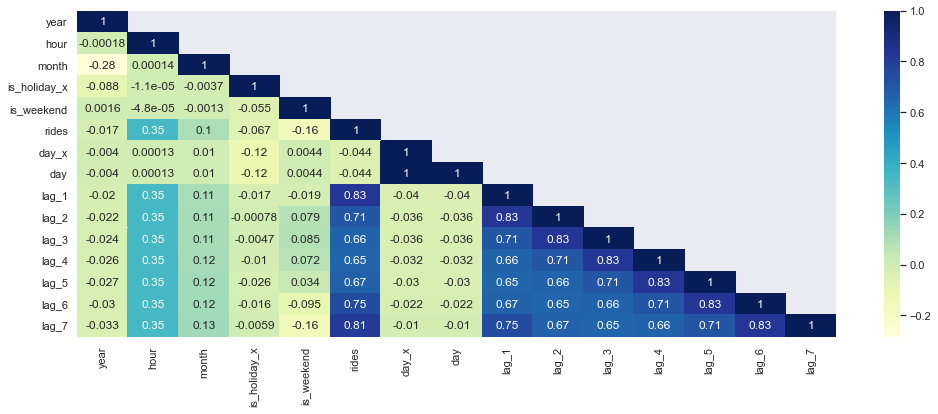

In [94]:
corr_matrix = rides_per_hour.corr()
fig = plt.figure(figsize=(17, 6))

mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_matrix, mask = mask, annot=True, cbar=True,cmap="YlGnBu")
plt.show()

The higher correlation of the variable of demand (rides) is with the variable hour

## 2.2. Exploratory analysis of Stations dataframe

In the previous notebook we created to files for the stations, the file ``stations_final.csv`` which contains information about the stations (address, name, bases, longitude, latitude and postal code) and the file ``rides_per_stations.csv`` which contains information about the demand per hour per station

#### 2.2.1. Analyzing 'stations'

In [95]:
stations = pd.read_csv("stations_final.csv")

In [96]:
stations

,Unnamed: 0,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,2,Puerta del Sol nº 1,Puerta del Sol B,30,-3.701603,40.417313,28014
2,2,3,Calle Miguel Moya nº 1,Miguel Moya,24,-3.705842,40.420589,28004
3,3,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001
4,4,5,Calle Manuela Malasaña nº 5,Malasaña,24,-3.702587,40.428552,28004
...,...,...,...,...,...,...,...,...
259,259,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001
260,260,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001
261,261,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001
262,262,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727310,40.449120,28001


In [97]:
#!pip install folium
import folium

In [98]:
stations['longitude'] = stations['longitude'].astype('float')
stations['latitude'] = stations['latitude'].astype('float')

#we create a map with the location of interest (Madrid)
bike_stations = folium.Map(location=[stations.latitude.mean(), 
                           stations.longitude.mean()],
                 zoom_start=14, control_scale=True)

for index, location_info in stations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], 
                  popup=location_info["name"]).add_to(bike_stations)
    
bike_stations

Our goal is to predict the demand per zone (postal code), so we are going to use geopandas library to plot the different zones of Madrid, to better understand the problem we are trying to solve.

The file ``España/espania.shp``is a shapefile file that contains information about the shape of the Spain (geometry and postal codes).

The file ``codigos_madrid.csv`` contains information about all the postal codes in Madrid, we are going to use this dataframe to obtain the shape of Madrid

In [99]:
#pip install geopandas
import geopandas as gpd
#pip install fiona.whl
#! pip install GDAL-3.4.2-pp38-pypy38_pp73-win_amd64.whl
from shapely.geometry import Point, Polygon, LineString, MultiPoint, mapping
shapefile = gpd.read_file('España/espania.shp')

In [100]:
codigos_madrid = pd.read_csv("codigos_madrid.csv", sep = ";")

In [101]:
shapefile['codigo_postal'] = shapefile["COD_POSTAL"]
shapefile['codigo_postal'] = shapefile['codigo_postal'].astype('int64')

In [102]:
shapefile = shapefile.merge(codigos_madrid, how='inner',left_on = "codigo_postal", right_on="codigo_postal")

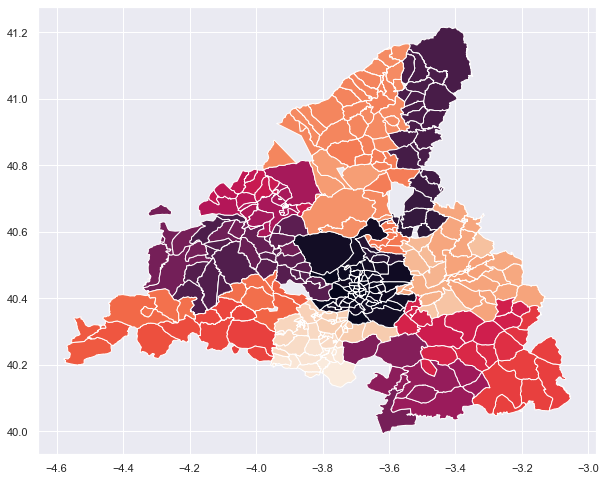

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "codigo_postal");

In [104]:
number_stations = stations.groupby('postal_code')['id'].count().reset_index()
number_stations['number_stations'] = number_stations ['id']
number_stations = number_stations[['postal_code', 'number_stations']]

In [105]:
#We merge the shapefile of madrid with our stations
shapefile = shapefile.merge(number_stations, how='left', left_on ="codigo_postal", right_on="postal_code")

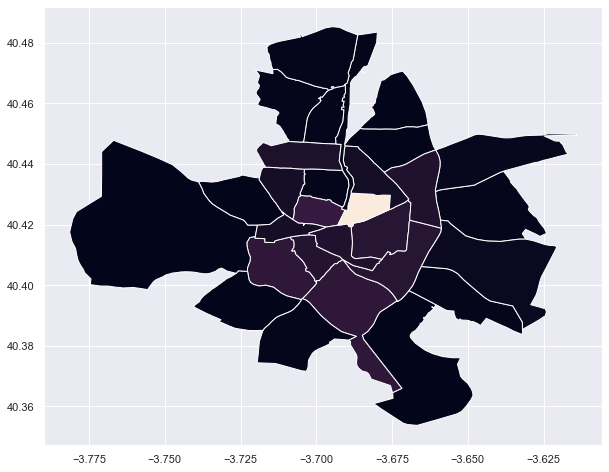

In [106]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "number_stations");

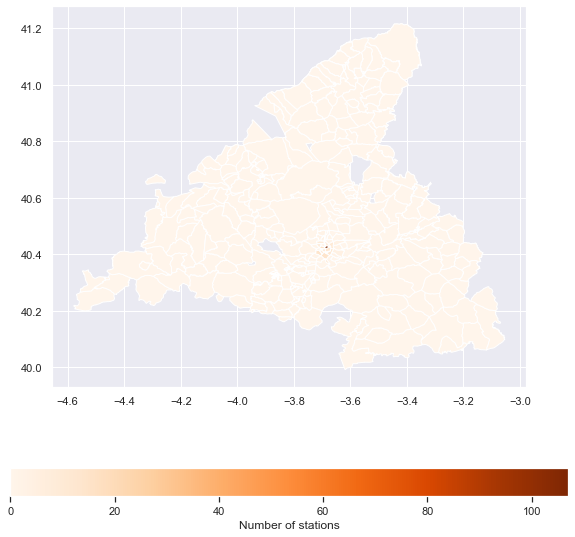

In [107]:
shapefile.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "number_stations",cmap='Oranges', legend_kwds={'label': "Number of stations",
                                                                             'orientation': "horizontal"}, legend=True);

In [108]:
import matplotlib.colors as mplc
import matplotlib.ticker as ticker

In [109]:
shapefile_1 = shapefile[shapefile['Provincia']=="Madrid"]

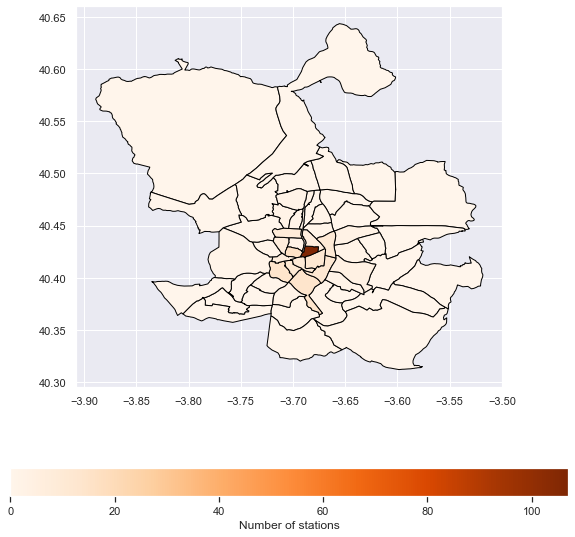

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile_1.plot(ax=ax, column = "number_stations",cmap='Oranges', legend = True, legend_kwds={'label': "Number of stations",
                                                                             'orientation': "horizontal"},
                linewidth=1,
                edgecolor="black");

The map represents the number of stations per postal code of Madrid. In the most centrical places there is a higher number of stations

##### Number of stations per postal code

We are interested in predicting the demand per zone, to determine the zones we are going to use the postal code, so we are going to analyze the stations per postal code

In [111]:
#Group the dataframe by the postal code and count the number of stations
stations_per_postal_code = stations.groupby('postal_code').count().reset_index()
#We are interested in the number of stations
stations_per_postal_code['number_stations'] = stations_per_postal_code['id']
stations_per_postal_code  = stations_per_postal_code[['postal_code', 'number_stations']]
#Ordering by number of stations descendent
stations_per_postal_code.sort_values(by='number_stations', ascending=False, inplace=True)
stations_per_postal_code

,postal_code,number_stations
0,28001,107
3,28004,16
4,28005,14
26,28045,14
6,28007,12
8,28009,12
11,28012,11
21,28028,10
13,28014,10
2,28003,9


In [112]:
#Count the number of postal codes with the service
stations_per_postal_code['postal_code'].count()

29

In [113]:
stations_per_postal_code['number_stations'].sum()

264

There are 264 stations of the service of bicimad, located in 29 postal codes

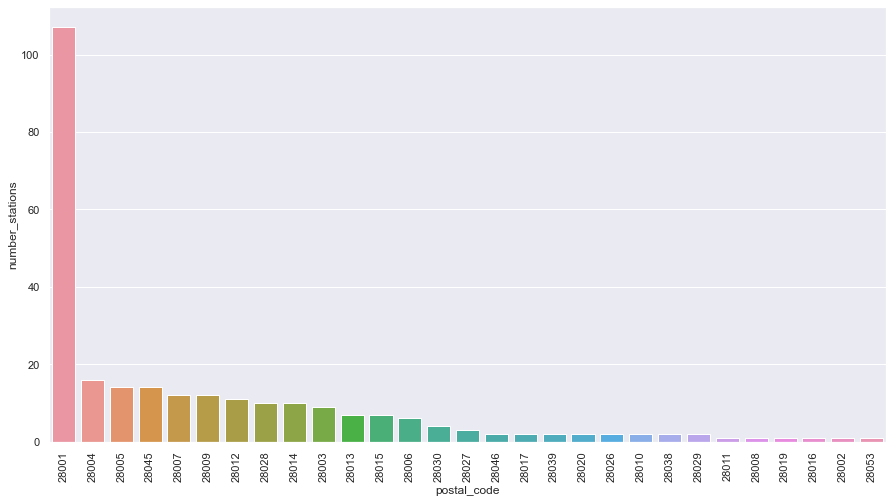

In [114]:
ax = sns.barplot(x='postal_code', y = 'number_stations', data = stations_per_postal_code,
                 order = stations_per_postal_code.sort_values('number_stations', ascending = False).postal_code);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Most of the stations (63%) are located in the postal code 28001, in the city center, to develop the models per zone we need to reduce this number, so we are going to perform a cluster analysis to divide this postal code in different zones.

#### 2.2.2 Analyzing demand per stations

**Number of rides per origin station**

We are going to analyze the number of stations with higher demand (origin stations). In the first notebook we created a csv file ``rides_per_station.csv`` where we saved all the pick ups of bycicles per hour and station

In [119]:
rides_per_station = pd.read_csv("rides_per_station.csv")
rides_per_station

,Unnamed: 0,idunplug_station,date,weekday,hour,month,year,day,time,datetime,rides,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,2019-01-01,Tuesday,8,1,2019,1,08:00:00,2019-01-01 08:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,1,2019-01-01,Tuesday,11,1,2019,1,11:00:00,2019-01-01 11:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
2,2,1,2019-01-01,Tuesday,13,1,2019,1,13:00:00,2019-01-01 13:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
3,3,1,2019-01-01,Tuesday,14,1,2019,1,14:00:00,2019-01-01 14:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
4,4,1,2019-01-01,Tuesday,15,1,2019,1,15:00:00,2019-01-01 15:00:00,2,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629781,2629781,270,2021-06-30,Wednesday,18,6,2021,30,18:00:00,2021-06-30 18:00:00,4,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629782,2629782,270,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629783,2629783,270,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629784,2629784,270,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,1,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003


##### Aggregated demand per station

We are going to analyze the number of rides per station (in global). To identify the station we concatenate the name of the station and the postal code.

In [142]:
rides_per_station['station'] = rides_per_station['name'] + " - " + rides_per_station['postal_code'].astype(str)


0          Puerta del Sol A - 28014
1          Puerta del Sol A - 28014
2          Puerta del Sol A - 28014
3          Puerta del Sol A - 28014
4          Puerta del Sol A - 28014
                     ...           
2629781             Zurbano - 28003
2629782             Zurbano - 28003
2629783             Zurbano - 28003
2629784             Zurbano - 28003
2629785             Zurbano - 28003
Name: station, Length: 2629786, dtype: object

In [144]:
#sum the number of rides per station
aggregated_rides_per_station = rides_per_station.groupby('station')['rides'].sum()
aggregated_rides_per_station = aggregated_rides_per_station.reset_index()
#Order by rides descendent
aggregated_rides_per_station.sort_values(by = 'rides', ascending = False, inplace=True)
aggregated_rides_per_station

,station,rides
245,Segovia 45 - 28005,106700
181,Plaza de Lavapiés - 28012,106545
189,Plaza de la Cebada - 28005,99518
97,General Álvarez de Castro - 28001,93382
206,Puerta de Madrid - 28009,88832
...,...,...
36,Carlota O’Neill - 28001,1676
47,Chamartín - 28001,1670
247,Serrano 113 - 28001,1471
122,Manuel Caldeiro - 28001,848


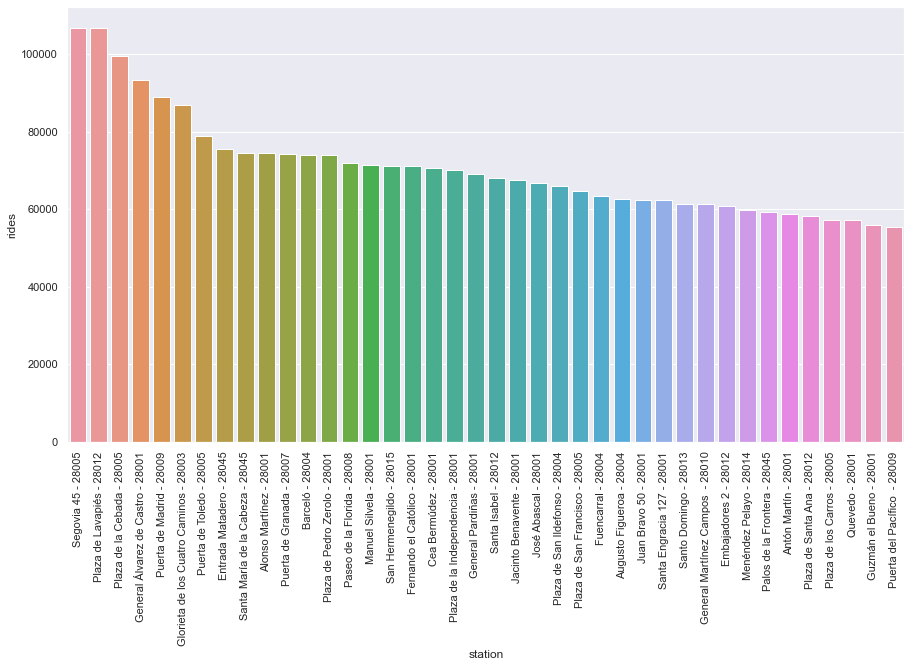

In [146]:
ax = sns.barplot(x='station', y = 'rides', data = aggregated_rides_per_station.head(40),
                 order = aggregated_rides_per_station.head(40).sort_values('rides', ascending = False).station);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

The stations with higher demand of bicycles are Segovia 45 (postal code 28005) and Plaza de Lavapiés (postal code 28012).

##### Average demand per postal code

In [148]:
#average rides per postal code
average_rides_postal_code = rides_per_station.groupby('postal_code')['rides'].mean()
average_rides_postal_code = average_rides_postal_code.reset_index()
#Order by rides descendent
average_rides_postal_code.sort_values(by = 'rides', ascending = False, inplace=True)
average_rides_postal_code

,postal_code,rides
4,28005,3.998580
9,28010,3.815397
1,28002,3.786457
11,28012,3.726643
15,28016,3.673842
7,28008,3.637614
8,28009,3.512715
26,28045,3.422813
3,28004,3.396395
13,28014,3.377991


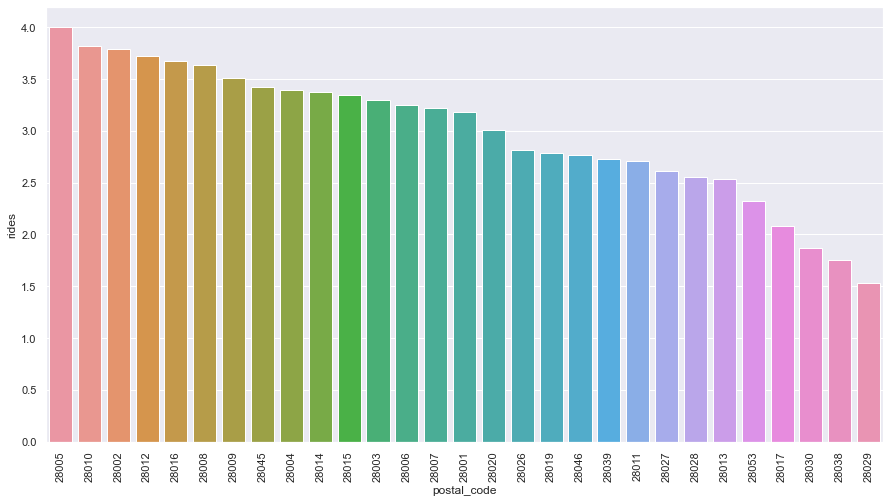

In [149]:
ax = sns.barplot(x='postal_code', y = 'rides', data = average_rides_postal_code,
                 order = average_rides_postal_code.sort_values('rides', ascending = False).postal_code);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

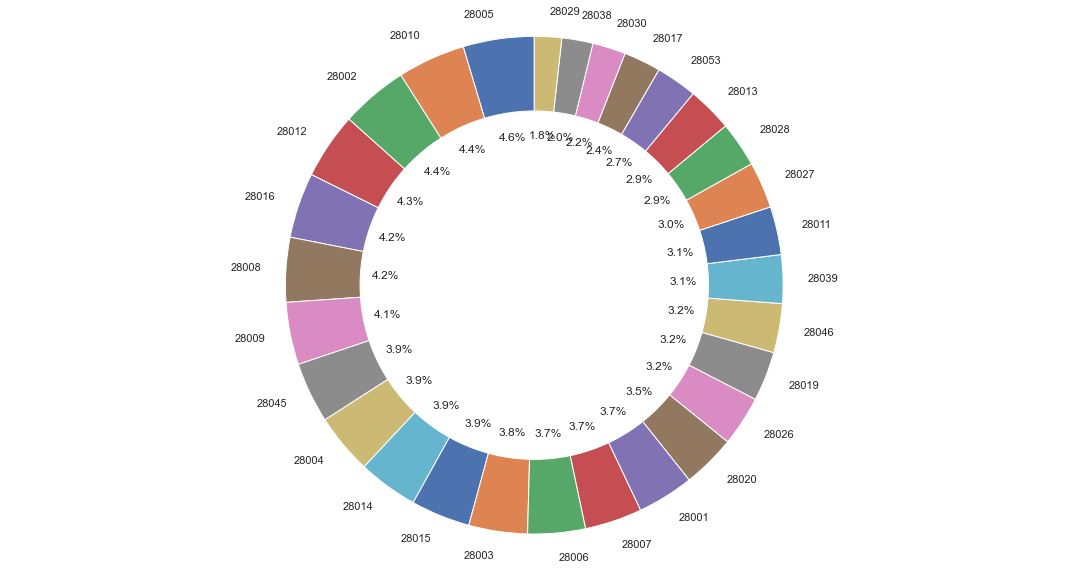

In [152]:

# Pie chart with percentage of average demand per postal code
labels = average_rides_postal_code['postal_code']
sizes = average_rides_postal_code['rides']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()

This analysis of the stations helped us understand which are the most popular stations and postal codes, in the frontend, we will be looking at these trends in more detail in the stations.